#### Menguji Mask untuk Ekstraksi Ciri

In [1]:
# Package yang dibutuhkan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray
from skimage.morphology import binary_erosion, binary_dilation

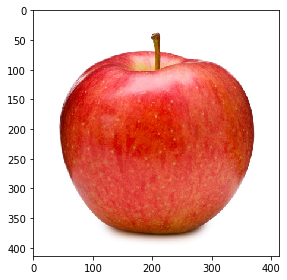

In [259]:
# Import gambar

img = imread('picture/good/good_8.jpg')
imshow(img)

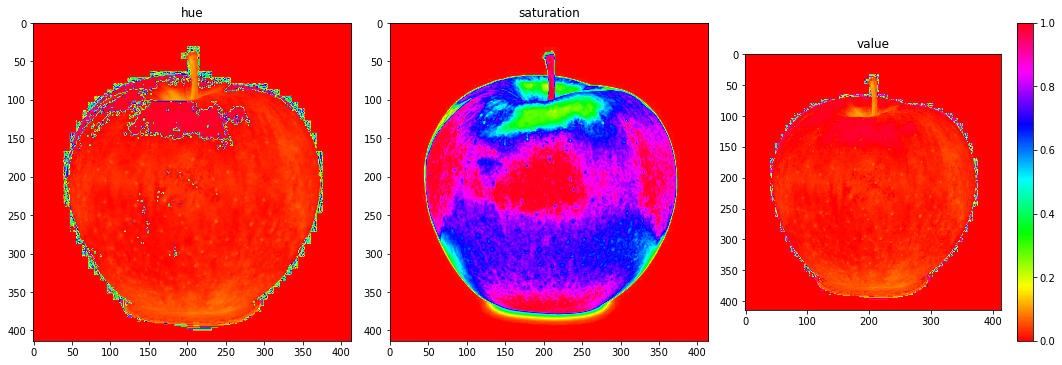

In [260]:
# Mengubah RGB ke HSV

imgHSV = rgb2hsv(img)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(imgHSV[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(imgHSV[:,:,1],cmap='hsv')
ax[1].set_title('saturation')
ax[2].imshow(imgHSV[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(imgHSV[:,:,0],cmap='hsv')) 
fig.tight_layout()

In [261]:
# Membuat mask untuk segmentasi

# Mask seluruh buah
lower_mask = imgHSV[:,:,0] <= 1
upper_mask = imgHSV[:,:,0] >= 0
saturation_mask = imgHSV[:,:,1] > 0.25
all_mask = upper_mask * lower_mask * saturation_mask

# Mask matang
# 1
lower_mask = imgHSV[:,:,0] >= 0
upper_mask = imgHSV[:,:,0] < 0.045
saturation_mask = imgHSV[:,:,1] > 0.25
value_mask = imgHSV[:,:,2] <= 1
mature_mask_lower = lower_mask * upper_mask * saturation_mask * value_mask
# 2
lower_mask = imgHSV[:,:,0] > 0.9
upper_mask = imgHSV[:,:,0] <= 1
saturation_mask = imgHSV[:,:,1] > 0.25
mature_mask_upper = lower_mask * upper_mask * saturation_mask
# Final mask
mature_mask = mature_mask_lower + mature_mask_upper

# Mask belum matang
lower_mask = imgHSV[:,:,0] > 0.175
upper_mask = imgHSV[:,:,0] < 0.5
saturation_mask = imgHSV[:,:,1] > 0.5
immature_mask = lower_mask * upper_mask * saturation_mask


In [262]:
# Melakukan operasi morfologi pada mask buah

morf_mask = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
all_mask = binary_dilation(all_mask, morf_mask)
all_mask = binary_erosion(all_mask, morf_mask)

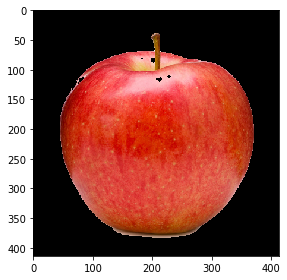

In [263]:
# Menguji mask buah

mask = all_mask
red = img[:,:,0] * mask
green = img[:,:,1] * mask
blue = img[:,:,2] * mask
img_masked = np.dstack((red,green,blue))
imshow(img_masked)

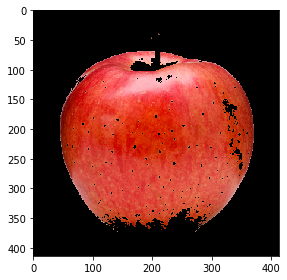

In [264]:
# Menguji mask matang

mask = mature_mask
red = img[:,:,0] * mask
green = img[:,:,1] * mask
blue = img[:,:,2] * mask
img_masked = np.dstack((red,green,blue))
imshow(img_masked)

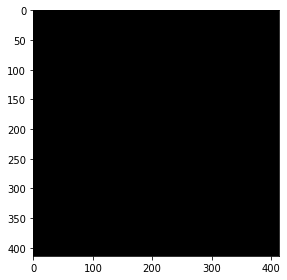

In [265]:
# Menguji mask belum matang

mask = immature_mask
red = img[:,:,0] * mask
green = img[:,:,1] * mask
blue = img[:,:,2] * mask
img_masked = np.dstack((red,green,blue))
imshow(img_masked)

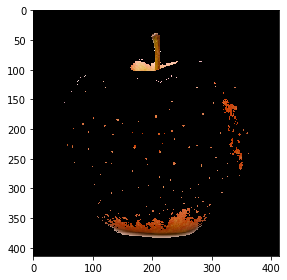

In [266]:
# Menampilkan daerah busuk

rotten_mask = all_mask ^ mature_mask
mask = rotten_mask
red = img[:,:,0] * mask
green = img[:,:,1] * mask
blue = img[:,:,2] * mask
img_masked = np.dstack((red,green,blue))
imshow(img_masked)

In [291]:
# Fungsi untuk pemeriksaan key pada ekstraksi ciri
def check_key(dic):
    if len(dic.keys()) == 1:
        if list(dic.keys())[0] == True:
            dic[False] = 0
        else:
            dic[True] = 0
        return dic
    return dic

In [294]:
# Ekstraksi ciri

unique, counts = np.unique(all_mask, return_counts=True)
allMaskCount = check_key(dict(zip(unique, counts)))[True]

unique, counts = np.unique(mature_mask, return_counts=True)
matureMaskCount = check_key(dict(zip(unique, counts)))[True]

unique, counts = np.unique(rotten_mask, return_counts=True)
rottenMaskCount = check_key(dict(zip(unique, counts)))[True]

unique, counts = np.unique(immature_mask, return_counts=True)
immatureMaskCount = check_key(dict(zip(unique, counts)))[True]


In [293]:
df = pd.DataFrame({'mature': [], 'immature': [], 'rotten': [], 'label': []})

In [296]:
df.loc[len(df.index)] = [matureMaskCount/allMaskCount, immatureMaskCount/allMaskCount, rottenMaskCount/allMaskCount, 0]

In [297]:
df

,mature,immature,rotten,label
0,0.919623,0.0,0.080377,0.0
